In [1]:
#-----01 within user----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys,os
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import StratifiedKFold
import time


In [13]:
# --------starts here-------

#label
y=[]
# for k in range(10):#num of participants
for i in range(14):
    for j in range(30):
        y.append(i)

print(len(y))
#------------
y_train = []
y_test = []
for i in range(14):
    for j in range(20):
        y_train.append(i)
    for j in range(10):
        y_test.append(i)
print(len(y_train),len(y_test))


tsfresh_feature = pd.read_csv("E:/XingDong/Texadar/data/final_filtered.csv")
tsfresh_feature = tsfresh_feature.drop(["id"],axis=1)
print(tsfresh_feature.shape)

420
280 140
(4200, 436)


In [14]:
print((y_train),(y_test))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 

In [3]:
tsfresh_feature

,v__autocorrelation__lag_9,v__autocorrelation__lag_8,v__number_peaks__n_3,v__autocorrelation__lag_1,v__partial_autocorrelation__lag_1,v__autocorrelation__lag_7,v__number_peaks__n_1,v__autocorrelation__lag_6,v__autocorrelation__lag_5,v__autocorrelation__lag_2,...,"v__fft_coefficient__coeff_10__attr_""angle""","v__fft_coefficient__coeff_9__attr_""angle""",v__ratio_beyond_r_sigma__r_1.5,"v__fft_coefficient__coeff_56__attr_""imag""","v__fft_coefficient__coeff_75__attr_""imag""","v__fft_coefficient__coeff_37__attr_""angle""",v__variance,v__standard_deviation,v__ratio_beyond_r_sigma__r_1,"v__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""rvalue"""
0,0.989000,0.990976,286.0,0.999961,0.999961,0.992798,296.0,0.994491,0.996053,0.999482,...,-50.657757,83.354925,0.093333,9.670716,614.807759,-57.287335,228.053721,15.101448,0.347619,0.312094
1,0.985627,0.988236,295.0,0.999911,0.999911,0.990647,304.0,0.992876,0.994910,0.999290,...,-86.480210,93.349019,0.195714,-188.279564,505.562656,-160.034648,243.895368,15.617150,0.208095,-0.168390
2,0.984270,0.987029,285.0,0.999903,0.999903,0.989585,300.0,0.991977,0.994203,0.999178,...,-91.153216,42.179312,0.210000,158.086682,-307.519795,152.155998,153.843832,12.403380,0.230238,-0.418151
3,0.978797,0.982370,303.0,0.999791,0.999791,0.985719,311.0,0.988892,0.991883,0.998737,...,34.338563,-43.666622,0.103095,274.472342,34.262217,153.748949,115.422609,10.743491,0.192143,-0.240111
4,0.987445,0.989629,289.0,0.999814,0.999814,0.991654,294.0,0.993538,0.995279,0.999186,...,128.436157,-49.478550,0.047619,-217.516243,-31.979274,-97.897011,218.292503,14.774725,0.115476,-0.789776
5,0.995797,0.996586,298.0,1.000044,1.000044,0.997313,306.0,0.997986,0.998603,0.999899,...,-114.607492,-79.707756,0.019524,-46.596907,-212.646945,-57.584849,559.790826,23.659899,0.445714,-0.717765
6,0.985994,0.988221,288.0,0.999605,0.999605,0.990309,296.0,0.992294,0.994181,0.998743,...,43.544378,15.556090,0.028571,-42.416589,203.573700,-16.519007,161.108094,12.692836,0.370476,0.658930
7,0.991417,0.992907,291.0,0.999871,0.999871,0.994298,299.0,0.995596,0.996792,0.999447,...,89.957003,-99.461603,0.036429,675.733655,-400.265317,103.695129,426.005805,20.639908,0.279762,-0.798464
8,0.968640,0.974221,296.0,0.999484,0.999484,0.979388,311.0,0.984153,0.988490,0.997960,...,176.349219,112.984779,0.021667,2086.106560,447.563822,98.394122,133.458123,11.552408,0.317143,0.813300
9,0.959028,0.966298,299.0,0.998996,0.998996,0.972997,310.0,0.979134,0.984680,0.996852,...,-113.560282,-24.735333,0.032619,-1116.269587,-941.774410,29.730974,128.791575,11.348638,0.198571,-0.908899


In [104]:

import pickle

# define a list of places
cjc_feature_list = list(tsfresh_feature.columns)

with open('cjc_feature_list.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(cjc_feature_list, filehandle)

In [38]:
#------ adding features from Shutong ------#
# fftfeatures1 = np.loadtxt(fname = "data/22gesture.txt",delimiter=',')
# fftfeatures = np.loadtxt(fname = "data/qstSpectro.txt",delimiter=',')
# fftfeatures = np.concatenate((fftfeatures1,fftfeatures2),axis=0)
fftfeatures = np.loadtxt(fname = "E:/XingDong/Texadar/data/fftFeature4200.txt",delimiter=',')
print(fftfeatures.shape)
_len = len(fftfeatures[:][0])
fft_df = pd.DataFrame(data=fftfeatures[:],    # values
              index=[i for i in range(4200)],    # 1st column as index
              columns=["f"+str(i) for i in range(_len)])
features_combine = fft_df.join(tsfresh_feature)
features_combine.shape

(4200, 100)


(4200, 536)

In [43]:
y = y
maxyhat_train=[0,0,0,0,0,0,0,0,0,0]
maxyhat_test=[0,0,0,0,0,0,0,0,0,0]
temp = 0
feature_list = []
train_results = [[],[],[],[],[],[],[],[],[],[]]
test_results = [[],[],[],[],[],[],[],[],[],[]]
# for i in range(10,20):
seconds = time.time()
for people in range(10):
    #get each user
    X = features_combine[people*420:(people+1)*420]
    x_train=X[0:20]
#     print(x_train)
    x_test=X[20:30]
    for gest in range(1,14):
        x_train = pd.concat([x_train,X[gest*30+0:gest*30+20]])
        x_test =  pd.concat([x_test,X[gest*30+20:gest*30+30]])
#     for i in range(10,20):
    for j in range(0,100):
#             x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=i, train_size=0.5, test_size=0.5)
        clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
        clf.fit(x_train, y_train)
        temp = clf.score(x_train, y_train)
        train_results[people].append(temp)
        if (temp > maxyhat_train[people]).any():
            maxyhat_train[people] = temp
        temp = clf.score(x_test, y_test)
        test_results[people].append(temp)
        feature_importances = pd.DataFrame(clf.feature_importances_,
                               index = x_train.columns,
                                columns=['importance']).sort_values('importance',ascending=False).sort_values('importance',ascending=False)
        if (maxyhat_test[people] < temp).any():
            maxyhat_test[people] = temp
            for feature in feature_importances.index.tolist()[:50]:
                if not feature in feature_list:
                    feature_list.append(feature)
    seconds = time.time()-seconds
    print(seconds)
    seconds = time.time()
    print(maxyhat_test)
print(maxyhat_train)
print(maxyhat_test)

34.46082067489624
[0.8928571428571429, 0, 0, 0, 0, 0, 0, 0, 0, 0]
41.33751702308655
[0.8928571428571429, 0.6357142857142857, 0, 0, 0, 0, 0, 0, 0, 0]
34.281715869903564
[0.8928571428571429, 0.6357142857142857, 0.8857142857142857, 0, 0, 0, 0, 0, 0, 0]
37.10540699958801
[0.8928571428571429, 0.6357142857142857, 0.8857142857142857, 0.8785714285714286, 0, 0, 0, 0, 0, 0]
30.013036251068115
[0.8928571428571429, 0.6357142857142857, 0.8857142857142857, 0.8785714285714286, 0.7071428571428572, 0, 0, 0, 0, 0]
30.884180545806885
[0.8928571428571429, 0.6357142857142857, 0.8857142857142857, 0.8785714285714286, 0.7071428571428572, 0.7, 0, 0, 0, 0]
32.222832441329956
[0.8928571428571429, 0.6357142857142857, 0.8857142857142857, 0.8785714285714286, 0.7071428571428572, 0.7, 0.6142857142857143, 0, 0, 0]
34.92296504974365
[0.8928571428571429, 0.6357142857142857, 0.8857142857142857, 0.8785714285714286, 0.7071428571428572, 0.7, 0.6142857142857143, 0.7571428571428571, 0, 0]
37.04681634902954
[0.8928571428571429

In [44]:
mylist = []
for i in range(10):
    mylist.append(np.max(test_results[i]))
print(mylist)
np.mean(mylist)


[0.8928571428571429, 0.6357142857142857, 0.8857142857142857, 0.8785714285714286, 0.7071428571428572, 0.7, 0.6142857142857143, 0.7571428571428571, 0.6142857142857143, 0.9071428571428571]


0.7592857142857142

In [29]:
print(len(feature_list))
(feature_list)
# import pickle


# with open('feature_list.data', 'wb') as filehandle:
#     # store the data as binary data stream
#     pickle.dump(feature_list, filehandle)

172


['f47',
 'v__number_peaks__n_3',
 'f48',
 'f62',
 'f42',
 'f52',
 'f65',
 'f64',
 'v__number_peaks__n_5',
 'f59',
 'v__spkt_welch_density__coeff_2',
 'v__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"stderr"',
 'f46',
 'v__number_peaks__n_1',
 'f53',
 'v__number_peaks__n_10',
 'f45',
 'f63',
 'f3',
 'v__absolute_sum_of_changes',
 'f2',
 'f57',
 'f4',
 'v__cid_ce__normalize_False',
 'v__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
 'v__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"stderr"',
 'v__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.0',
 'v__spkt_welch_density__coeff_8',
 'f44',
 'f68',
 'v__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.0',
 'v__mean_abs_change',
 'f66',
 'v__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0',
 'v__ar_coefficient__k_10__coeff_2',
 'v__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.0',
 'v__agg_linear_trend__f_agg_"mean"__chunk_len_5__attr_"stderr"',
 'v__agg_linear_trend__f_agg_"m

In [60]:
y = y
maxyhat_train=[0,0,0,0,0,0,0,0,0,0]
maxyhat_test=[0,0,0,0,0,0,0,0,0,0]
temp = 0
train_results = [[],[],[],[],[],[],[],[],[],[]]
test_results = [[],[],[],[],[],[],[],[],[],[]]
# for i in range(10,20):
seconds = time.time()
for people in range(10):
    #get each user
    X = features_combine[people*420:(people+1)*420]
    for i in range(10,20):
        for j in range(10,20):
            x_train, x_test, y_train, y_test = train_test_split(X[feature_list], y, random_state=i, train_size=0.5, test_size=0.5)
            
            clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
            clf.fit(x_train, y_train)
            temp = clf.score(x_train, y_train)
            train_results[people].append(temp)
            if (temp > maxyhat_train[people]).any():
                maxyhat_train[people] = temp
            temp = clf.score(x_test, y_test)
            test_results[people].append(temp)
            feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False).sort_values('importance',ascending=False)
            if (maxyhat_test[people] < temp).any():
                maxyhat_test[people] = temp
              
    seconds = time.time()-seconds
    print(seconds)
    seconds = time.time()
print(maxyhat_train)
print(maxyhat_test)

16.541401624679565
17.55302667617798
16.469504356384277
18.107513666152954
17.236593008041382
17.465797424316406
18.27852773666382
17.041351079940796
16.88951563835144
17.283035278320312
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9761904761904762, 0.9142857142857143, 0.9952380952380953, 0.9619047619047619, 0.9285714285714286, 0.9714285714285714, 0.9, 0.9380952380952381, 0.9285714285714286, 0.9857142857142858]


In [61]:
mylist = []
for i in range(10):
    mylist.append(np.max(test_results[i]))
print(mylist)
np.mean(mylist)


[0.9761904761904762, 0.9142857142857143, 0.9952380952380953, 0.9619047619047619, 0.9285714285714286, 0.9714285714285714, 0.9, 0.9380952380952381, 0.9285714285714286, 0.9857142857142858]


0.95

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(np.arange(100), train_results,'b', label='Train AUC')
line2, = plt.plot(np.arange(100), test_results,'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [64]:
np.argmax([0,1,2,3,4,5,6])

6

In [46]:
y_max=[]
for i in range(10):
    y_max.append(np.argmax(test_results[i]))

In [35]:
test_results[0][18]

0.9

0.8928571428571429
Normalized confusion matrix
0.8428571428571429
Normalized confusion matrix
0.8357142857142857
Normalized confusion matrix
0.8428571428571429
Normalized confusion matrix
0.8357142857142857
Normalized confusion matrix
0.8214285714285714
Normalized confusion matrix
0.8214285714285714
Normalized confusion matrix
0.85
Normalized confusion matrix
0.8142857142857143
Normalized confusion matrix
0.8214285714285714
Normalized confusion matrix
Normalized confusion matrix


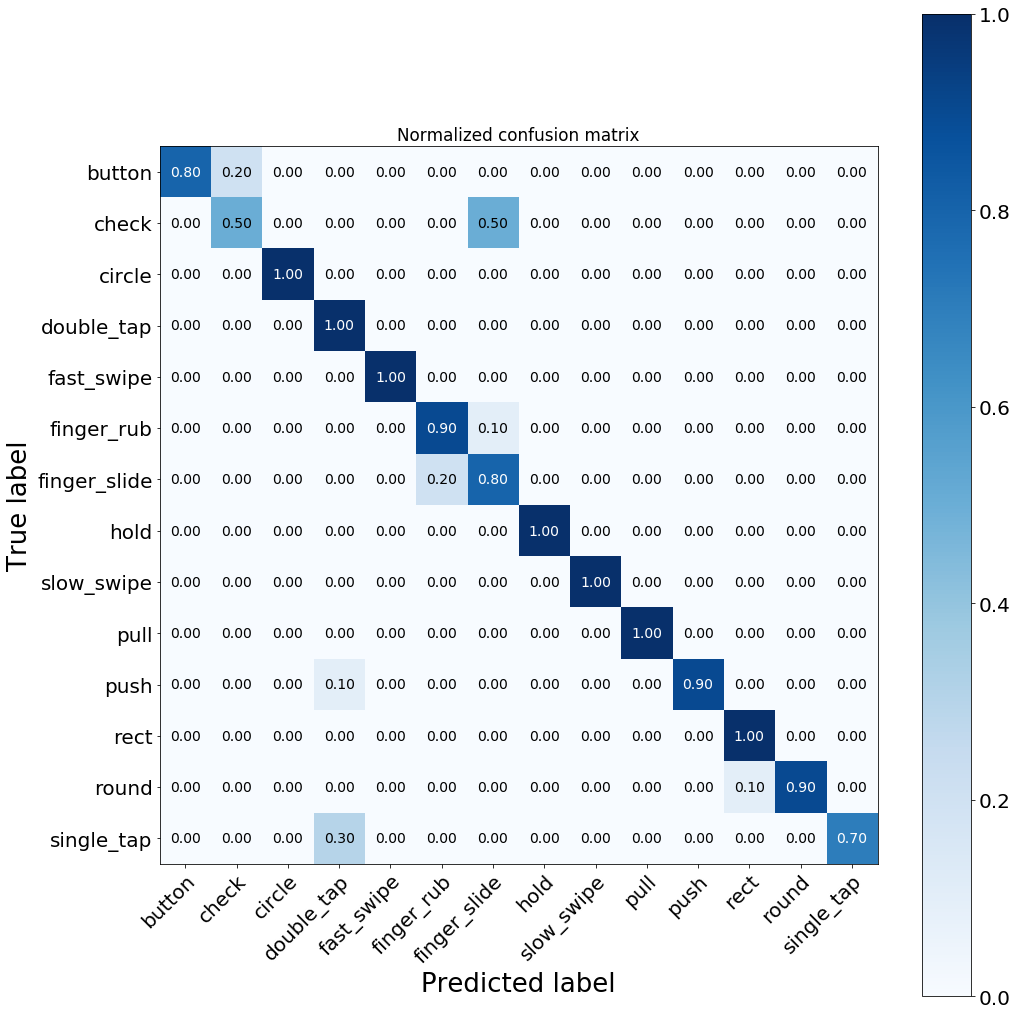

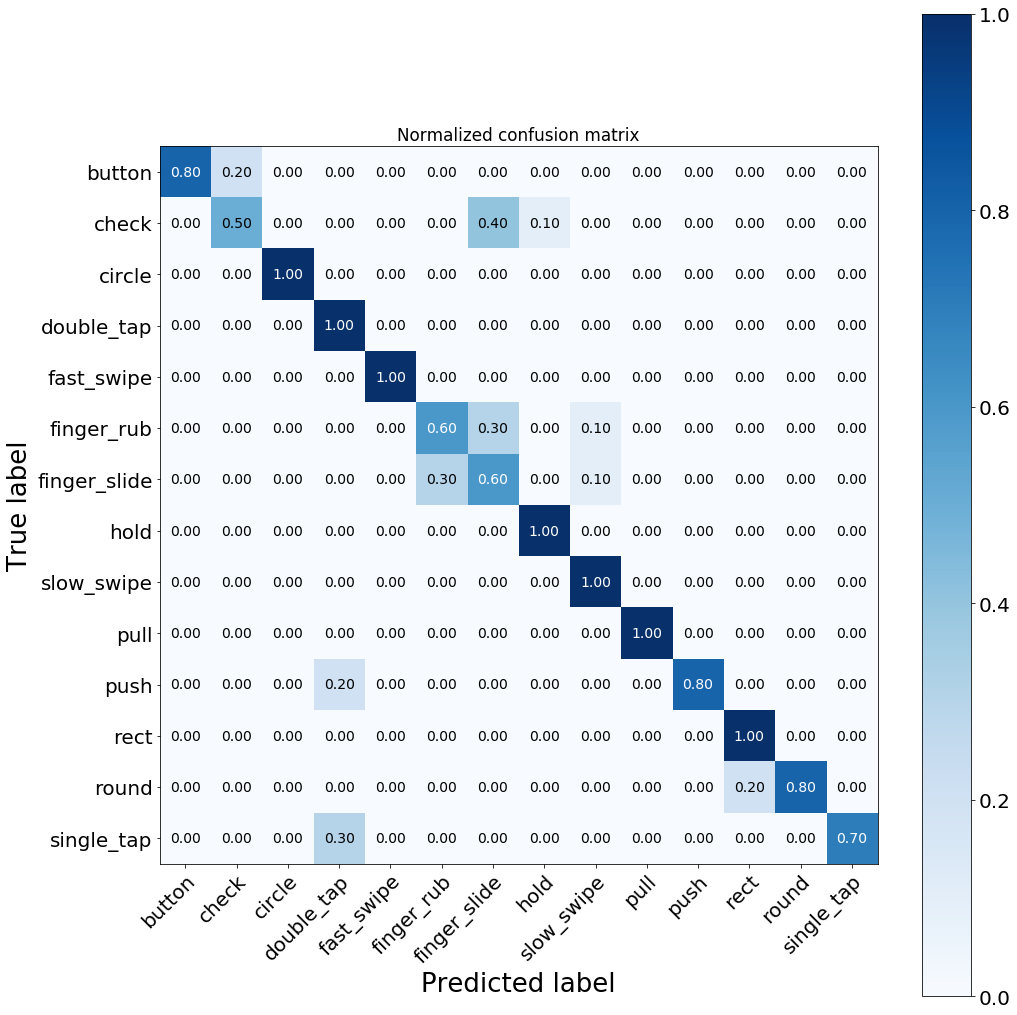

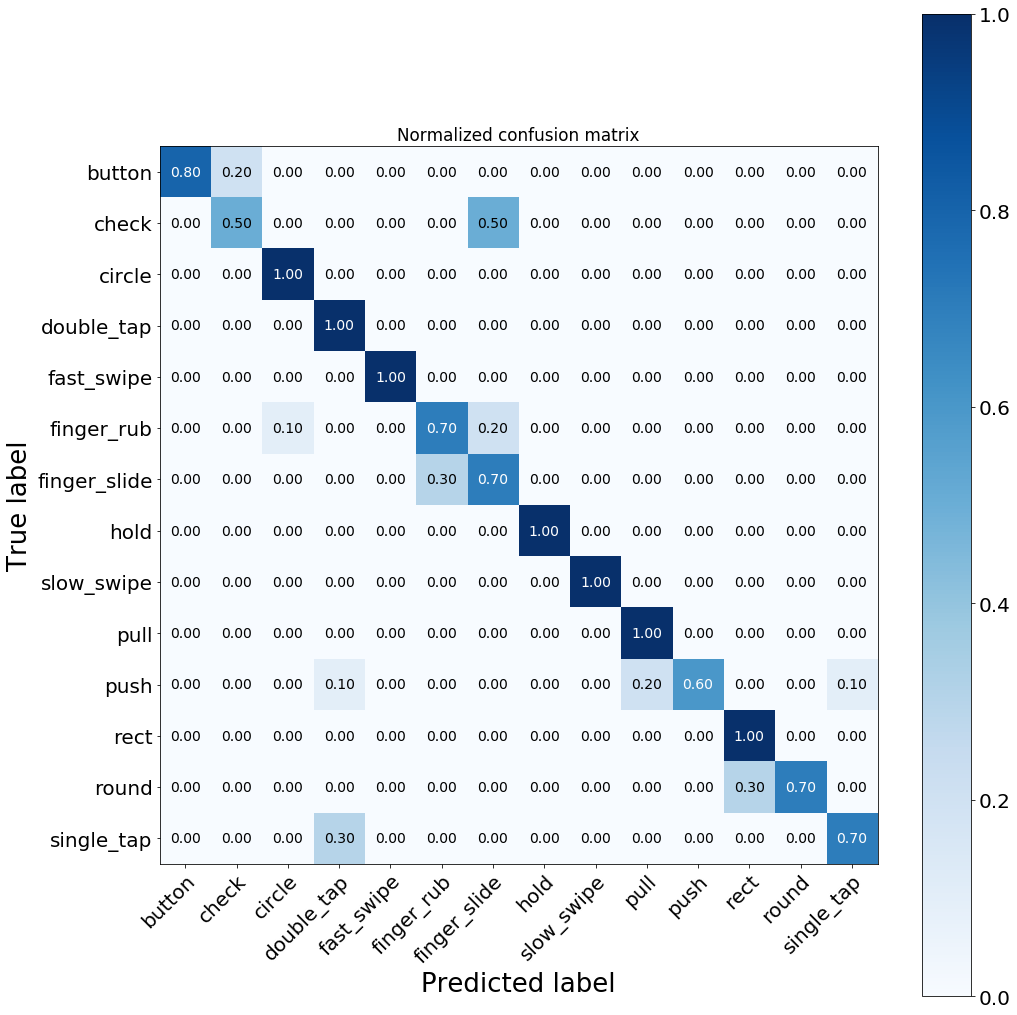

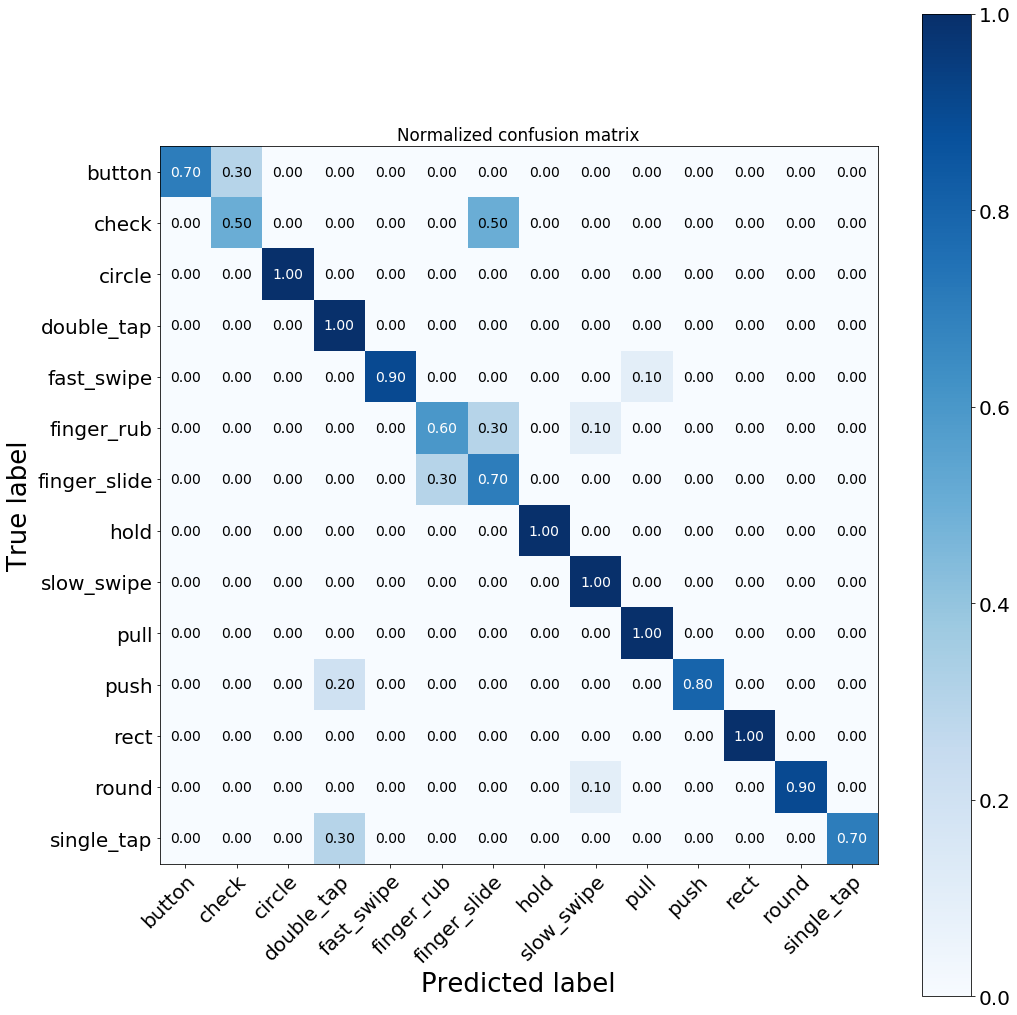

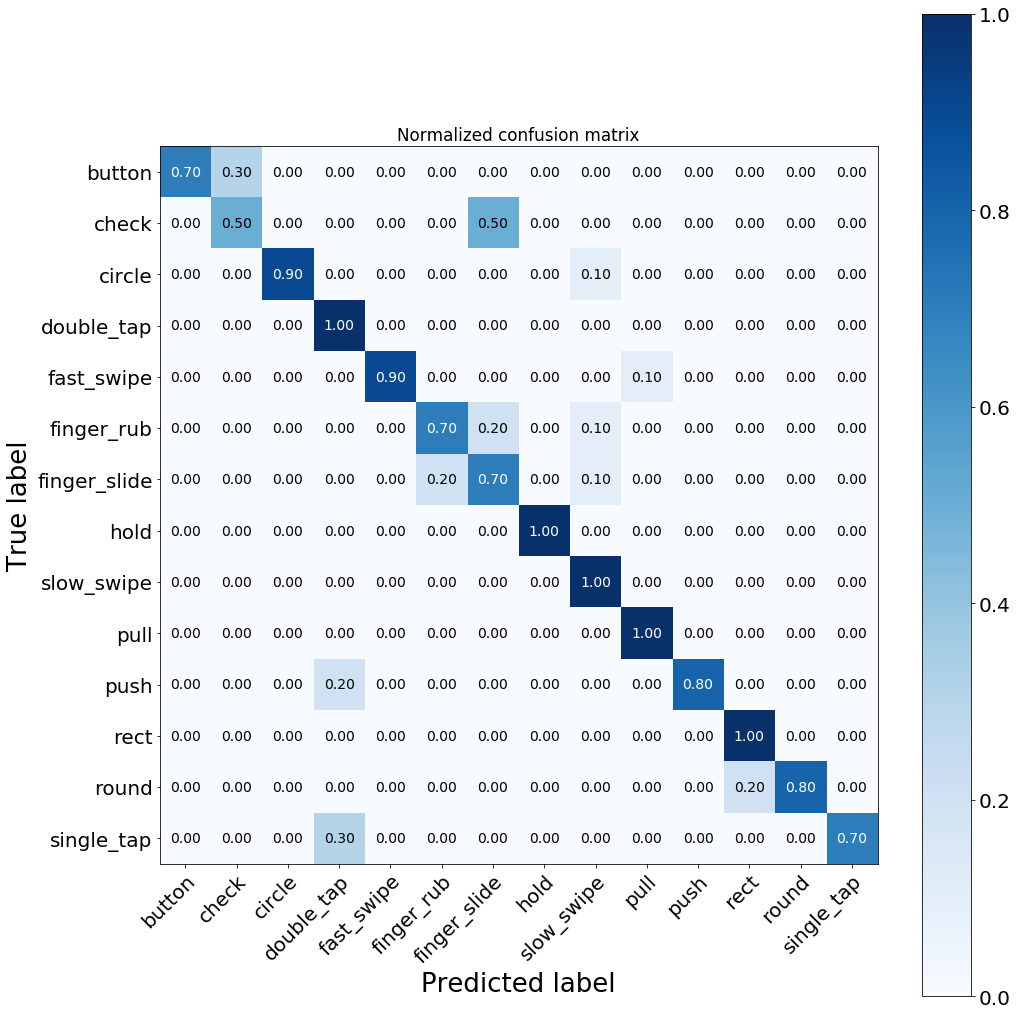

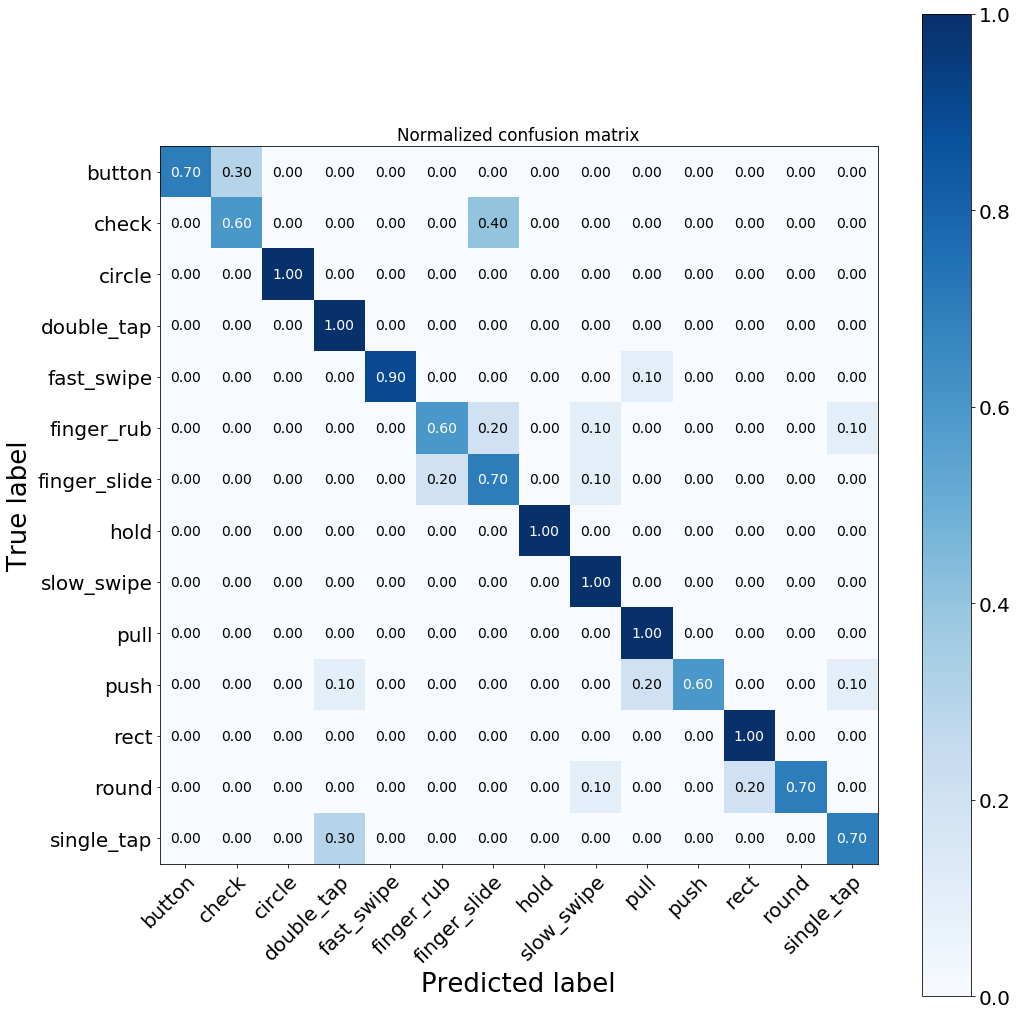

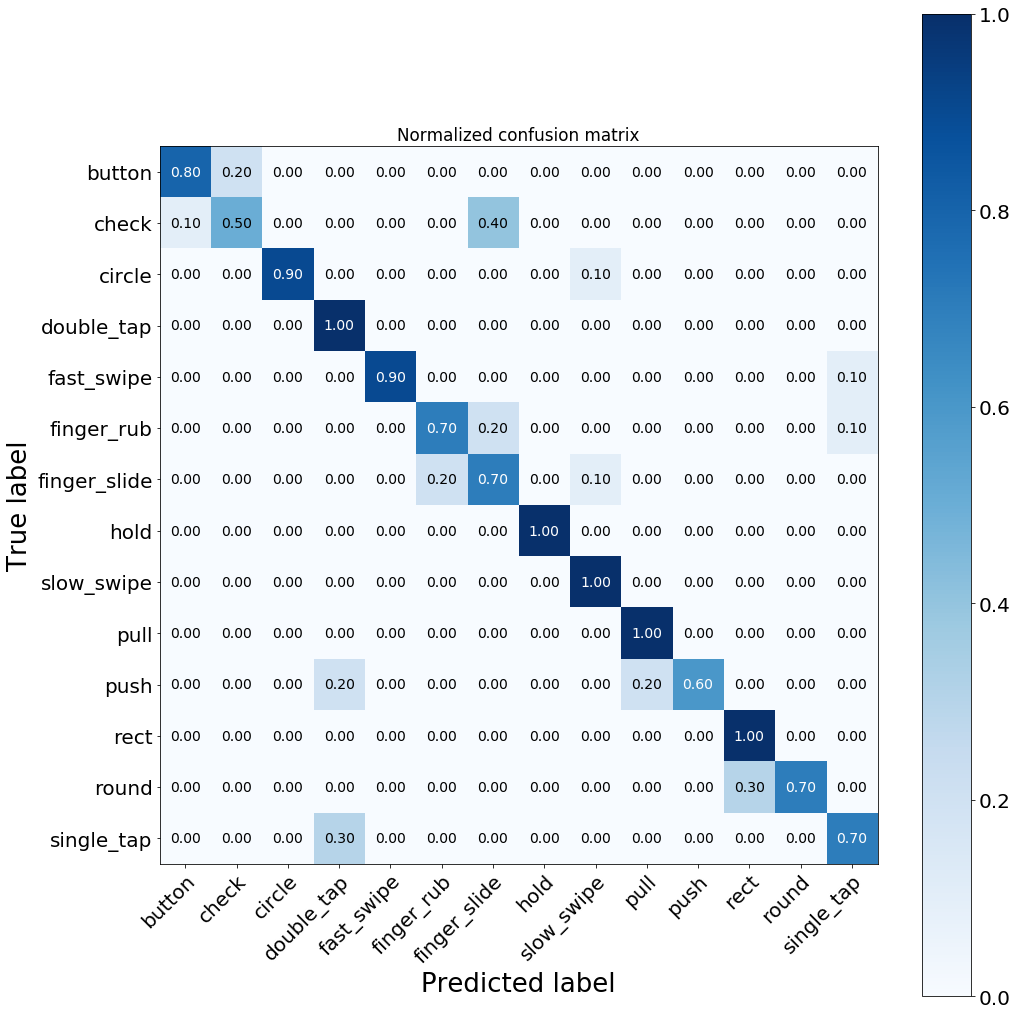

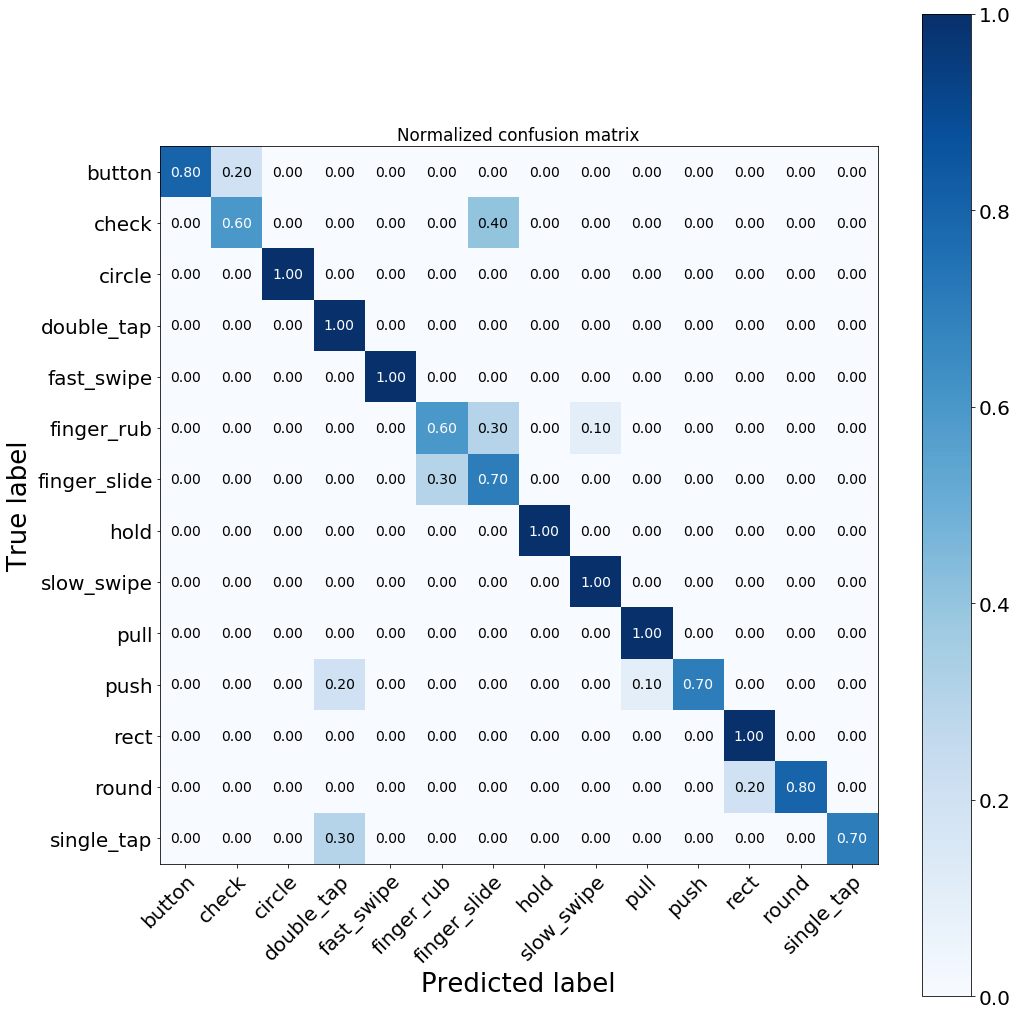

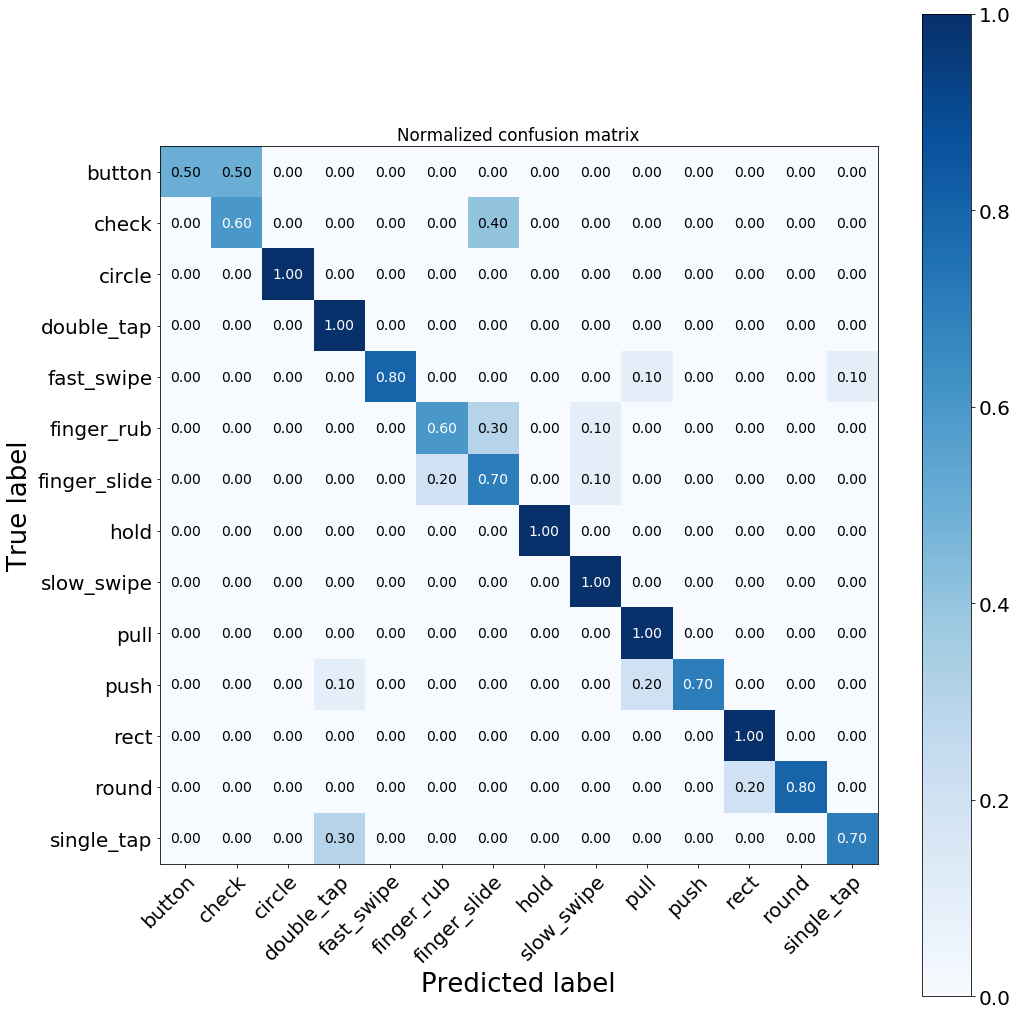

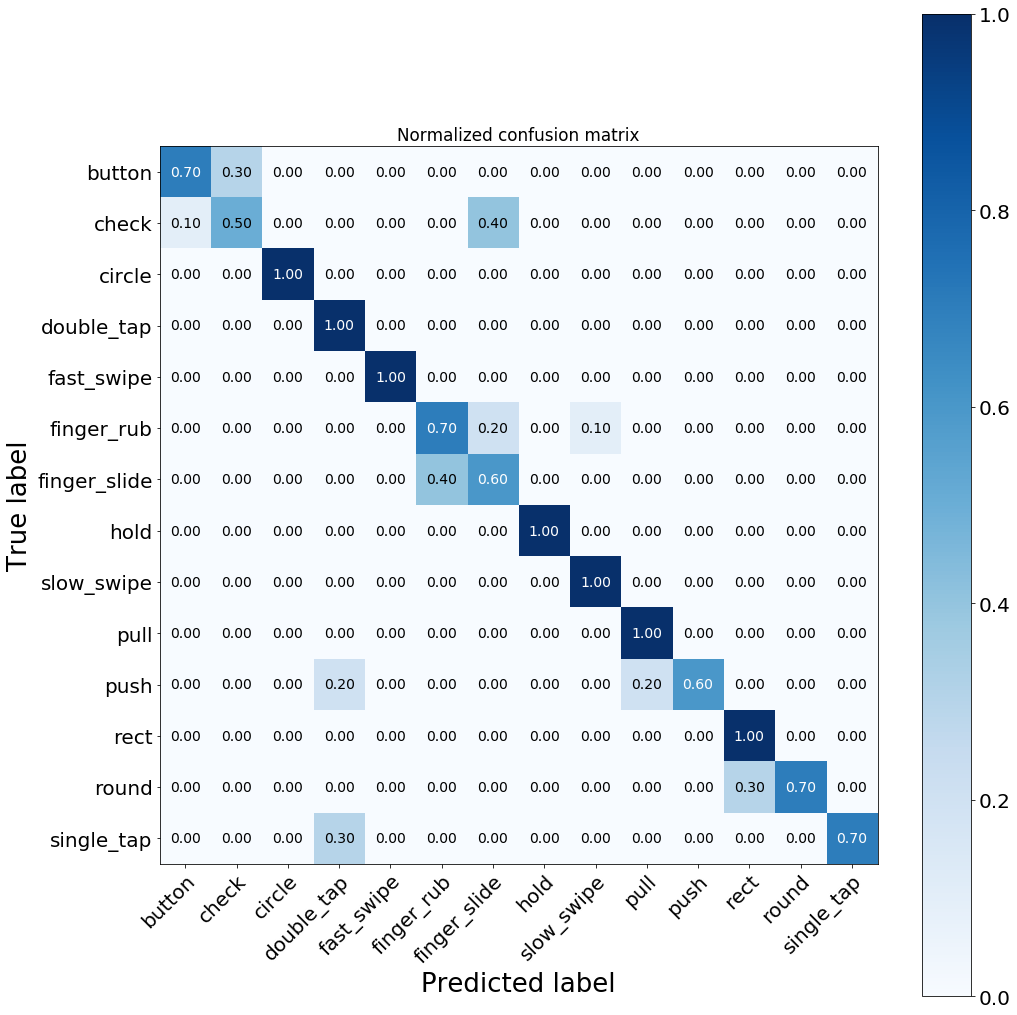

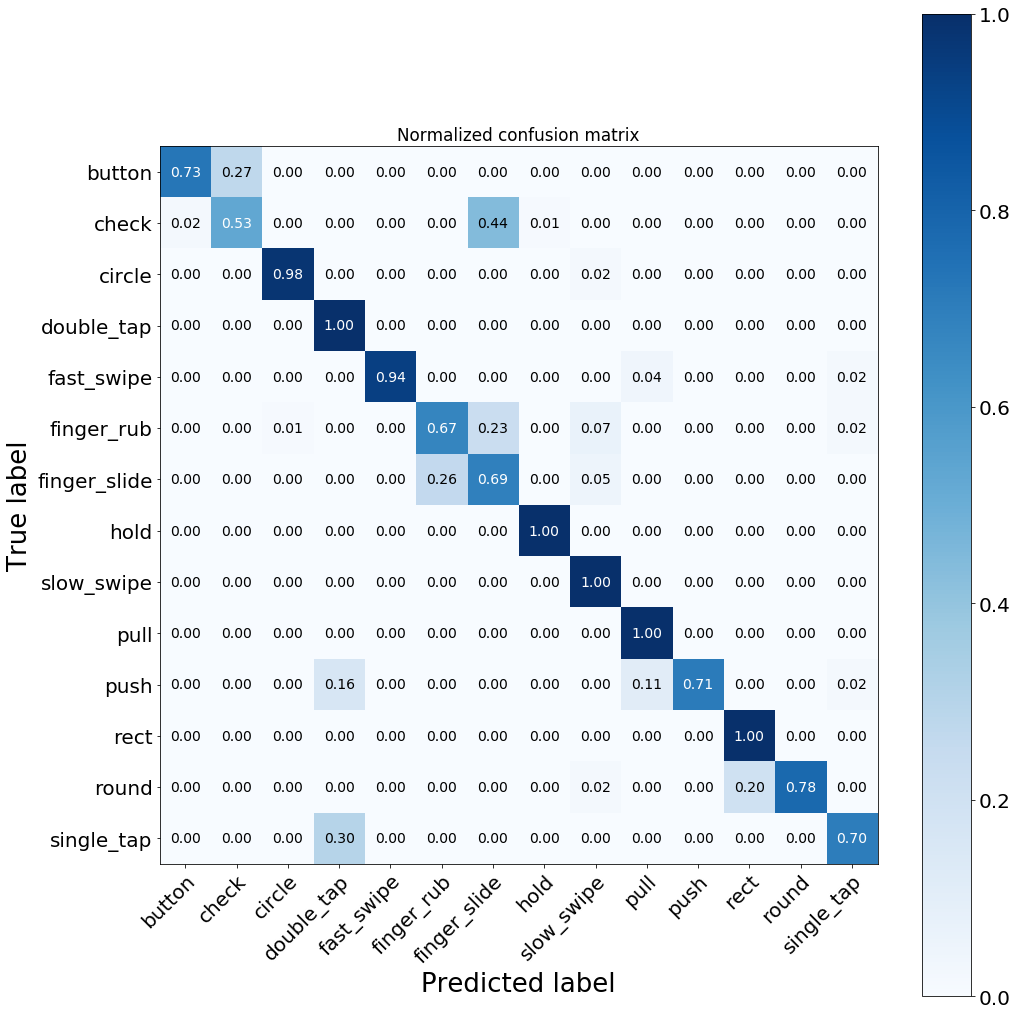

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0


In [49]:
#------ using ranked features ----------#
bestmodel = 0
maxyhat_test=0

fig = None
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    global fig
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)
    plt.rcParams.update({'font.size': 14})
    plt.rc('ytick', labelsize=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('axes', labelsize=26)

    fig, ax = plt.subplots(figsize=(15,15))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

v2_names=['button','check','circle','double_tap','fast_swipe','finger_rub',
         'finger_slide','hold','slow_swipe','pull','push','rect','round',
         'single_tap']

v2_names = np.array(v2_names)
y_pred = []
y_test_ = []

for people in range(10):
    
    #get each user
    X = features_combine[people*420:(people+1)*420]
    X = features_combine
    x_train=X[0:20]
#     print(x_train)
    x_test=X[20:30]
    for gest in range(1,14):
        x_train = pd.concat([x_train,X[gest*30+0:gest*30+20]])
        x_test =  pd.concat([x_test,X[gest*30+20:gest*30+30]])
        
    j=y_max[people]

    clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
    clf.fit(x_train, y_train)
    print(clf.score(x_test,y_test))
    y_pred = y_pred+list(clf.predict(x_test))
    plot_confusion_matrix(y_test, list(clf.predict(x_test)), classes=v2_names, normalize=True,title='')
#     print(list(clf.predict(x_test)))
#     print(y_test)
    y_test_ += y_test
plot_confusion_matrix(y_test_, y_pred, classes=v2_names, normalize=True,
          title='')
plt.show()

seconds = time.time()-seconds
#     print(seconds)
seconds = time.time()
print(maxyhat_train)
print(maxyhat_test)
fig.savefig("4200_session.png", bbox_inches = "tight")

In [101]:
from joblib import dump, load
dump(clf, '4200.joblib')

['4200.joblib']

In [ ]:
clf2 = load('filename.joblib')